In [275]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [320]:
d = pd.read_csv('../data/pier_2_eeg_1474063679.csv')
songs_w_eeg = pd.read_csv('../data/pier_2_songs_1474063679.csv')
songs_no_eeg = pd.read_csv('../data/pier_songs_no_eeg_1473740061.csv')

In [360]:
lines = open('pier_eeg_channels.txt').readlines()
lines = lines[1:]
lines = [line.strip() for line in lines]

CHANNELS = dict()
count = 0
for line in lines:
    label, _, color = line.partition(' ')
    num = count
    count += 1
    CHANNELS[num] = label

['T4  Red', 'T3  Brown', 'F8  Gray', 'F7  Purple', 'C4  Green', 'C3  Orange', 'F4  Yellow', 'F3  Dark Blue']


In [361]:
CHANNELS

{0: 'T4', 1: 'T3', 2: 'F8', 3: 'F7', 4: 'C4', 5: 'C3', 6: 'F4', 7: 'F3'}

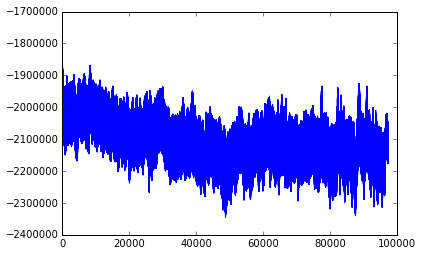

In [322]:
plt.plot(d.channel_0[:])

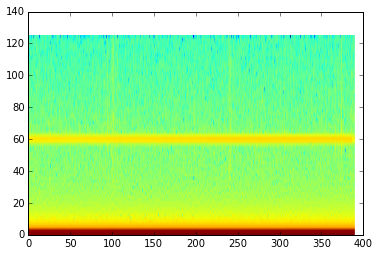

In [279]:
_ = plt.specgram(d.channel_2, NFFT=128, Fs=250, noverlap=64)
#FFT 128 transforms 

In [280]:
eeg = np.array(d.ix[:, 0:8])
eeg = eeg[250:,]

tag = np.array(d.ix[:, 'tag'])
tag = tag[250:]

In [281]:
from scipy import signal

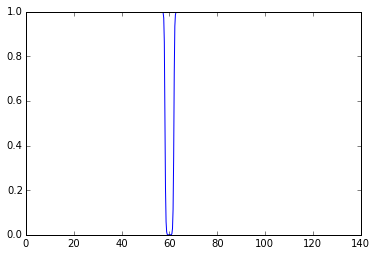

In [352]:
b, a = signal.butter(8, (4.0/125, 50.0/125), btype='bandpass') 
b, a
b2, a2 = signal.butter(8, (58.0/125, 62.0/125), btype='bandstop') 

f, x = signal.freqz(b2, a2)
plt.plot(f/np.pi*125, np.abs(x))

In [283]:
eeg_g = signal.lfilter(b2, a2, eeg, axis=0)
eeg_f = signal.lfilter(b, a, eeg_g, axis=0)

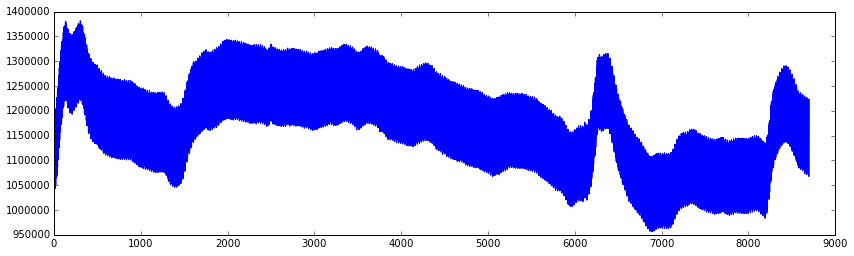

In [284]:
plt.figure(figsize=(14, 4))
plt.plot(eeg[800:9500, 7]) ## raw data

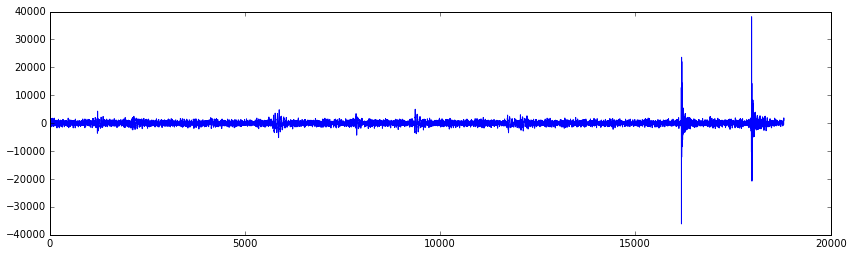

In [285]:
plt.figure(figsize=(14, 4))
plt.plot(eeg_f[1200:20000, 7])

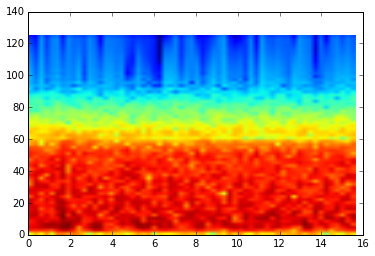

In [286]:
_ = plt.specgram(eeg_f[2000:6000,0], NFFT=128, Fs=250, noverlap=64)

In [287]:
from sklearn.decomposition import FastICA

In [288]:
# # My eyes were closed, duh

# ica = FastICA()
# sources = ica.fit_transform(eeg_f)
# means = ica.mean_.copy()
# mixing = ica.mixing_.copy()

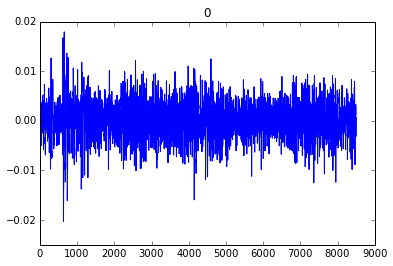

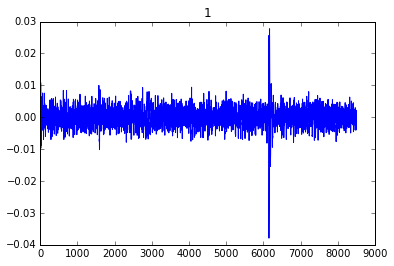

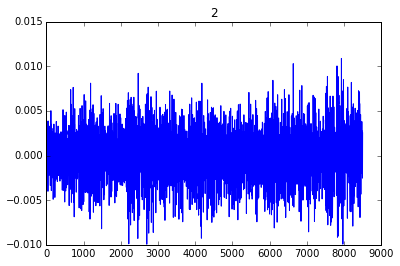

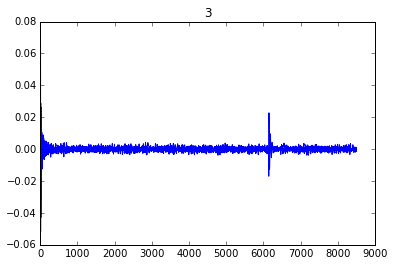

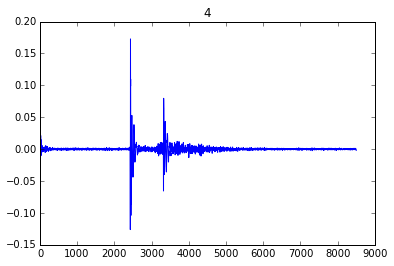

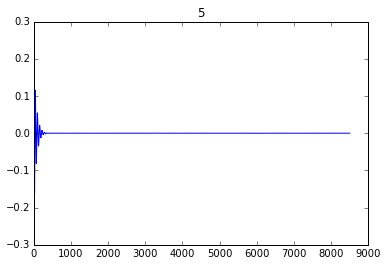

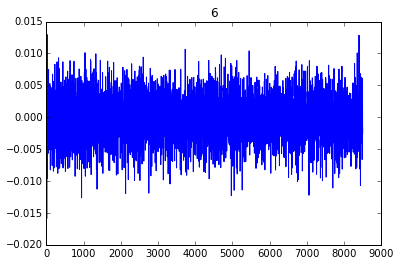

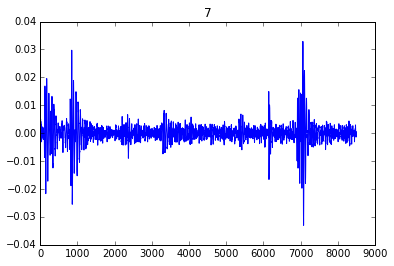

In [289]:
# for i in range(ica.components_.shape[0]):
#     plt.figure()
#     plt.plot(sources[:8500,i])
#     plt.title(i)

In [290]:
songs_w_eeg = pd.read_csv('../data/pier_2_songs_1474063679.csv')

In [291]:
song_dict = {}
for i in xrange(songs_w_eeg.shape[0]):
    print songs_w_eeg.ix[i][0]
    d = dict(song=songs_w_eeg.ix[i][0])
    song_dict[d['song']] = d
# song_dict = d

Bach - Art of Fugue Trimmed Volume.wav
Daft Punk - Get Lucky Trimmed Volume.wav
Leon Bridges - Coming Home Trimmed Volume.wav
Paradise Lunch - Guns and Roses Trimmed Volume.wav
J. Balvin - 6 AM ft. Farruko Trimmed Volume.wav
Harry Potter Hedwig Theme Trimmed Volume.wav
Mad World - Gary Jules Trimmed Volume.wav
Snakehips - All My Friends ft. Tinashe Chance The Rapper Trimmed Volume.wav
George Harrison - Here comes the sun Trimmed Volume.wav
The Grateful Dead - Touch of Grey Trimmed Volume.wav
Flying Lotus - Massage Situation Trimmed Volume.wav
Detective Conan Main Theme - Japanese Army Band Trimmed Volume.wav
J.B. Lenoir - Alabama Blues Trimmed Volume.wav
The Kooks - Seaside Trimmed Volume.wav
balle Trimmed Volume.wav
The Police - Roxanne Trimmed Volume.wav
Sublime - What I Got Trimmed Volume.wav
Bob Marley - Satisfy My Soul Trimmed Volume.wav
Third Eye Blind - Semi-Charmed Life (HQ) [Official] Trimmed Volume.wav
Bowling For Soup - Today Is Gonna Be A Great Day Trimmed Volume.wav
Young 

In [292]:
song_starts = []
prev_tag = None
for i,t in enumerate(tag):
    if t != 'focus' and t != '0' and t!= prev_tag:
        s = song_dict[t]
        song_starts.append( {'index': i,
                             'song': t,
                             'dict': s})
        prev_tag = t

Bach - Art of Fugue Trimmed Volume.wav
1674
Daft Punk - Get Lucky Trimmed Volume.wav
6123
Leon Bridges - Coming Home Trimmed Volume.wav
10693
Paradise Lunch - Guns and Roses Trimmed Volume.wav
15141
J. Balvin - 6 AM ft. Farruko Trimmed Volume.wav
19470
Harry Potter Hedwig Theme Trimmed Volume.wav
23925
Mad World - Gary Jules Trimmed Volume.wav
28187
Snakehips - All My Friends ft. Tinashe Chance The Rapper Trimmed Volume.wav
32636
George Harrison - Here comes the sun Trimmed Volume.wav
37211
The Grateful Dead - Touch of Grey Trimmed Volume.wav
41660
Flying Lotus - Massage Situation Trimmed Volume.wav
45868
Detective Conan Main Theme - Japanese Army Band Trimmed Volume.wav
50197
J.B. Lenoir - Alabama Blues Trimmed Volume.wav
54484
The Kooks - Seaside Trimmed Volume.wav
58679
balle Trimmed Volume.wav
63248
The Police - Roxanne Trimmed Volume.wav
67697
Sublime - What I Got Trimmed Volume.wav
72266
Bob Marley - Satisfy My Soul Trimmed Volume.wav
76706
Third Eye Blind - Semi-Charmed Life (HQ

In [350]:
np.diff([x['index'] for x in song_starts]) / 500.0

array([ 8.898,  9.14 ,  8.896,  8.658,  8.91 ,  8.524,  8.898,  9.15 ,
        8.898,  8.416,  8.658,  8.574,  8.39 ,  9.138,  8.898,  9.138,
        8.88 ,  8.898,  8.976,  8.656])

In [420]:
eeg_trials = np.zeros((8, len(song_starts), int(4700)))

In [416]:
running_diff = []
for i in range(len(song_starts)):
    if i != len(song_starts) - 1:
        d = song_starts[i]
        f = song_starts[i + 1]
        start = d["index"]
        end = f["index"]
    else:
        break
    diff = end - start
    running_diff.append(diff)
print max(running_diff)
print min(running_diff)
# print avg(running_diff)

4575
4195


In [422]:
song_names = []
for channel in range(8):
    for i in range(len(song_starts)):    
        d = song_starts[i]
        start = d['index']
        end = start + 4575
        # 125 samples = 0.5s, 500 samples = 2.0 s
        # we want 0.5s before the stimulus, seconds after stimulus will vary due to time stamp recording (took the max diff)
        eeg_trials[channel, i, :] = eeg_f[start-125:end, channel]
        song_names.append(song_starts[i]['song'])

In [325]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [429]:
song_names_filtered = song_names[0:21]
time = np.arange(0, eeg_trials.shape[2], 1) / 250.0 - 0.5

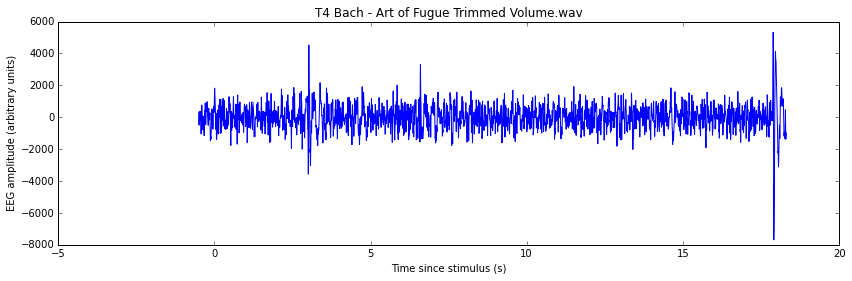

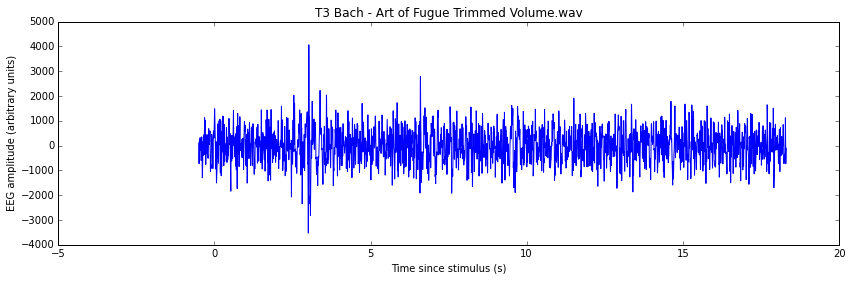

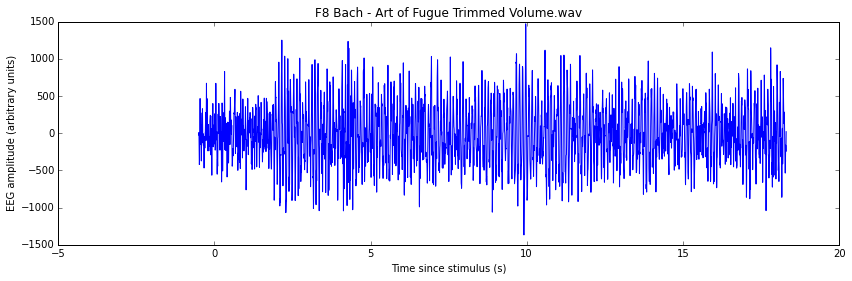

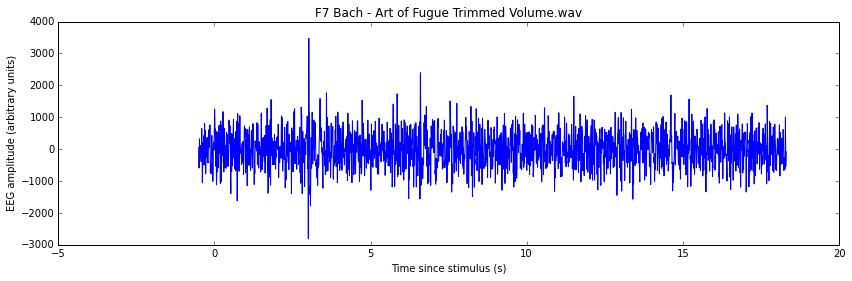

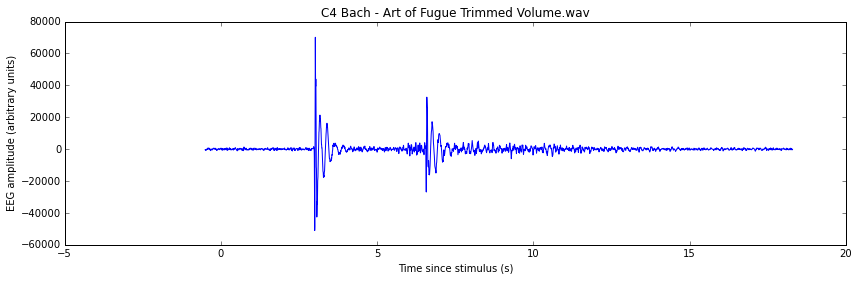

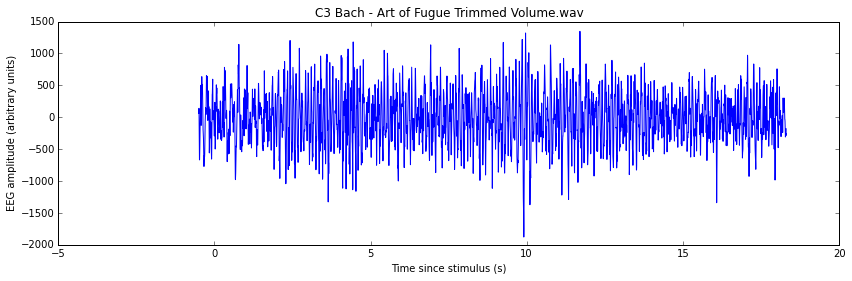

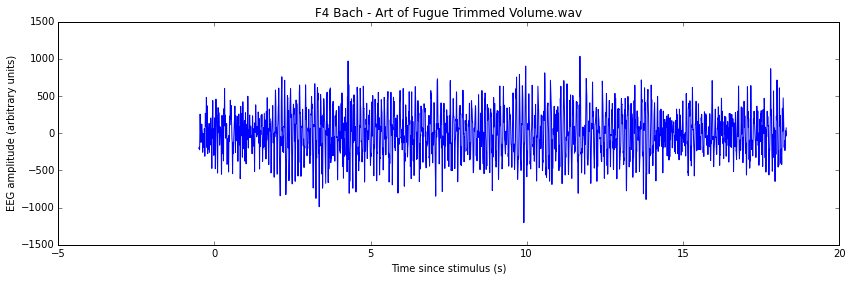

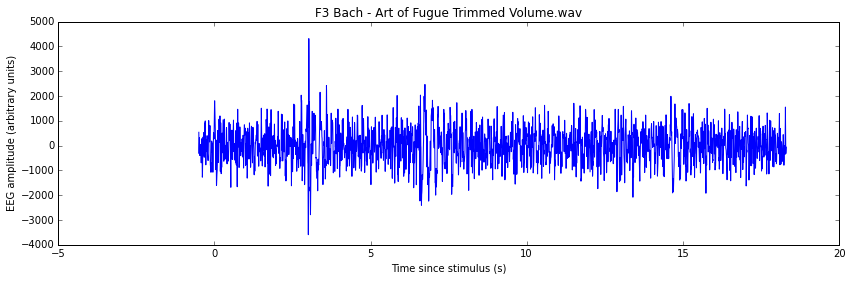

In [471]:
# N_AVG = 10
# time_arr =[]
# for j in range(eeg_trials.shape[1]) -- This would be for each song
for i in range(eeg_trials.shape[0]):
    plt.figure(figsize=(14, 4))
    
    song_plot = eeg_trials[i][0] #replace 1 with j
#     song_plot_np = np.array(song_plot)
    _ = plt.plot(time[:], song_plot, c='blue')
    plt.title(str(CHANNELS[i]) + " " + str(song_names[0]))
    
    plt.xlabel('Time since stimulus (s)')
    plt.ylabel('EEG amplitude (arbitrary units)')

In [470]:
nyq_rate = 250/ 2.0


125.0

In [314]:
# channels = []
# for i in xrange(8):
#     channel = channel + str(i)
#     channels.append(channel)

In [315]:
# sfreq = 250 #250 Hz OpenBCI
# info = mne.create_info(channels, sfreq)

In [324]:
# raw = mne.io.RawArray(d, info)

In [323]:
# np.loadtxt('../data/pier_2_eeg_1474063679.csv', delimiter=',')